In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import SpectralClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline

## Collecting data

In [5]:
raw_data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data").content
data = pd.read_csv(io.StringIO(raw_data.decode('utf-8')))
data.shape

(8123, 23)

## Encoding the data Ordinally
This has problems, as it doesn't really work. Category 5 is just more weighted than category 2, instead of using the numbers as actual categories as intended

In [11]:
oe = OrdinalEncoder()
oe.fit(data)
encoded = oe.transform(data)
encoded

array([[0., 5., 2., ..., 3., 2., 1.],
       [0., 0., 2., ..., 3., 2., 3.],
       [1., 5., 3., ..., 2., 3., 5.],
       ...,
       [0., 2., 2., ..., 0., 1., 2.],
       [1., 3., 3., ..., 7., 4., 2.],
       [0., 5., 2., ..., 4., 1., 2.]])

In [119]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(encoded)
ymeans = kmeans.predict(encoded)
ymeans.shape

(8123,)

In [44]:
labels = kmeans.labels_
metrics.silhouette_score(encoded,labels,metric='euclidean')

0.28692963595470766

## "Goodness" of the model based on k
k=2 =>0.28692963595470766

k=3 =>0.2565490206352191

k=4 =>0.26679042168579903

k=5 =>0.26407092303543467

k=6 =>0.27255113478266635

k=7 =>0.26032617551839315

k=8 =>0.26275683571120945

k=9 =>0.24285235492874097

k=10 =>0.24211516055140386

.. Har en negativ trend, Optimal k ser ut som er 2

In [56]:
scores = []
for i in range(2, 1000):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(encoded)
    ymeans = kmeans.predict(encoded)
    ymeans.shape
    labels = kmeans.labels_
    scores.append(metrics.silhouette_score(encoded,labels,metric='euclidean'))
scores

[0.28692963595470766,
 0.25650301679391097,
 0.26679042168579903,
 0.26407092303543467,
 0.2723951776522723,
 0.27999224369755127,
 0.2652672198689304,
 0.2406462601675638,
 0.23814633350212694,
 0.23469857955670753,
 0.24257345052061866,
 0.23519240457020635,
 0.24557285428968,
 0.2213177004192315,
 0.21756068329815104,
 0.24070837443920154,
 0.2134189238846822,
 0.22277087627713085,
 0.2251333835135745,
 0.23527588736416546,
 0.2222052144882066,
 0.2333707993202206,
 0.23684277966373973,
 0.23679319905713447,
 0.23144556602876482,
 0.2324688048517885,
 0.23445001931684778,
 0.22923649804986793,
 0.22226088917589093,
 0.22739310160113382,
 0.2656621936539561,
 0.23566794481736864,
 0.22974931653451233,
 0.23191403950962783,
 0.23062600656159646,
 0.22274888365661416,
 0.23408671087272062,
 0.23668075059849025,
 0.22757539162331097,
 0.23337791418176065,
 0.24228083243394163,
 0.23609914826737943,
 0.22877738033377573,
 0.23539807899586065,
 0.24289847464590694,
 0.23068719695041728,
 

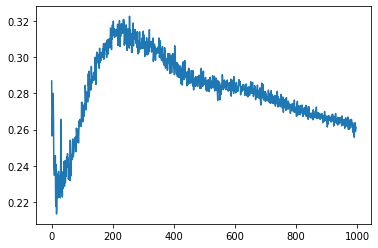

In [57]:
plots=[]
pd_scores=pd.DataFrame(scores)
plt.plot(pd_scores)
plt.show()

## Konklusjon av k analyse
Vi ser at k starter veldig bra på k=2, men så stuper den ned ganske raskt. Etter hvert som k øker, øker scoren og, så en alternativ k kan være k=250.Siden vi har hele 9000 soppe instanser, så blir det ikke overfitting helt enda.

## Spectral Clusetering for plotting, but still using broken encoding

In [113]:
sc = SpectralClustering(n_clusters=250,assign_labels="kmeans",affinity='nearest_neighbors',n_neighbors=25)
clusters_labels = sc.fit_predict(encoded)
clusters_labels

c:\users\kwecky\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([ 48, 137, 164, ...,  98,  12,   6])

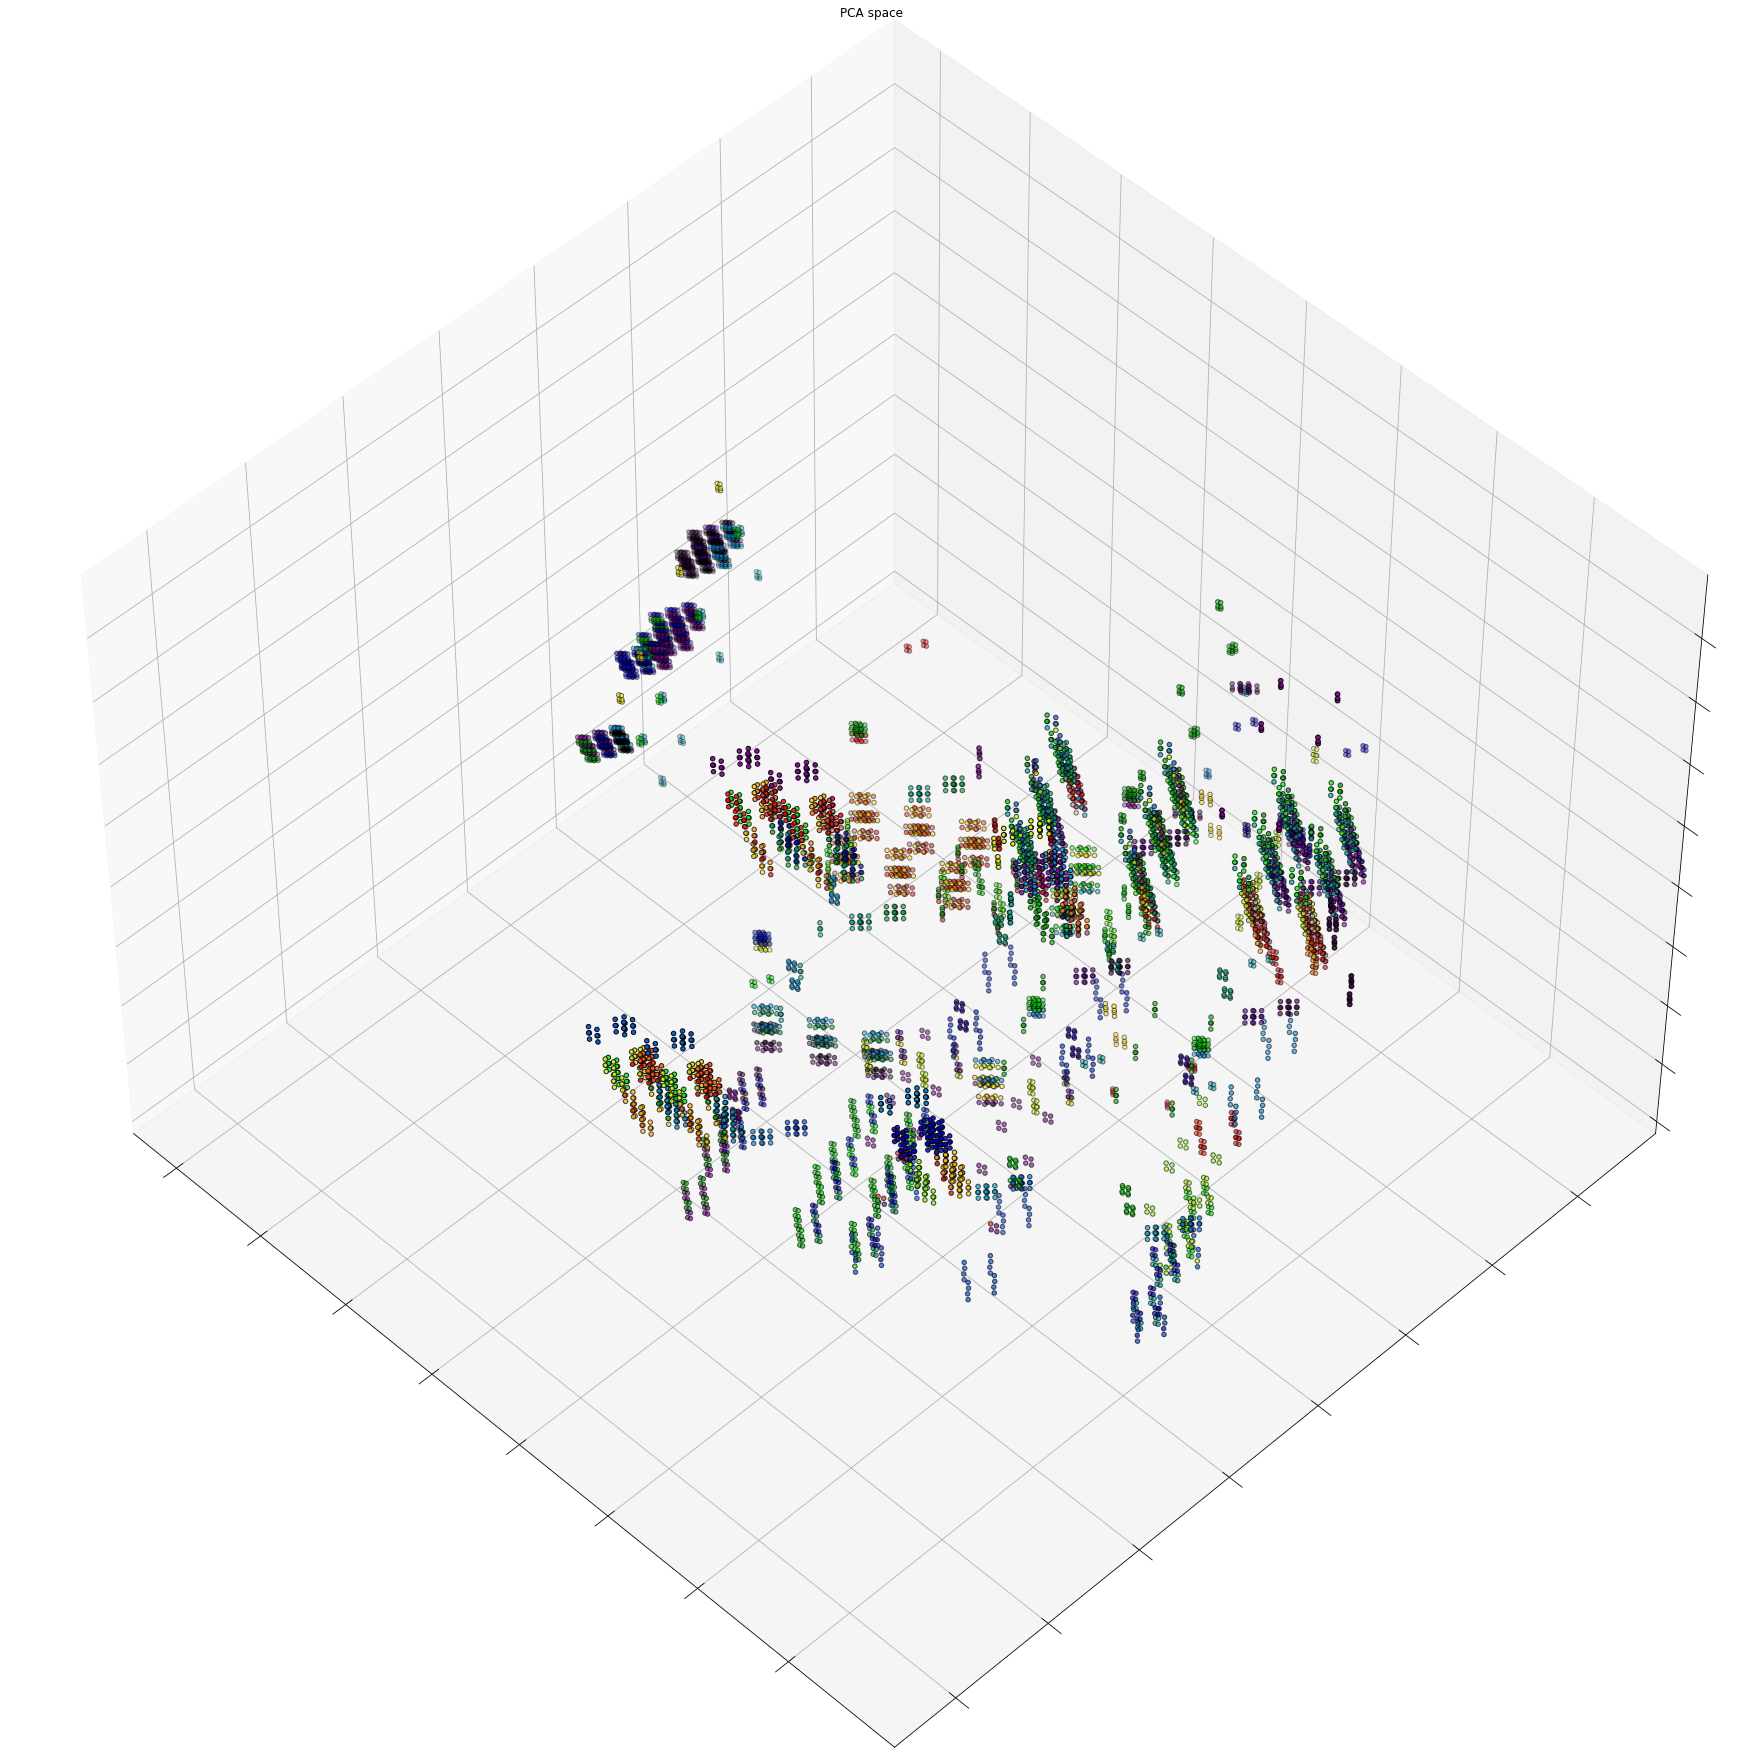

In [114]:
svc = SVC()
pca = PCA(n_components=3)
pipe =Pipeline([('reduce_dim',pca),('clf',svc)])
pipe.fit(encoded,clusters_labels)
pca_res = pca.transform(encoded)
pca_res

fig = plt.figure(2, figsize=(16, 12))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, 2, 2], elev=48, azim=135)

plt.cla()

ax2.scatter(pca_res[:, 0], pca_res[:, 1], pca_res[:, 2], c=clusters_labels, cmap=plt.cm.nipy_spectral,edgecolor='k')

ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_title("PCA space")

plt.draw()
plt.show()

## Repeating above process with dummy data. 
I still want to preserve the results from the Ordinal encoding for comparison

In [118]:
dummy = pd.get_dummies(data)
dummy

,p_e,p_p,x_b,x_c,x_f,x_k,x_s,x_x,s_f,s_g,...,s.3_s,s.3_v,s.3_y,u_d,u_g,u_l,u_m,u_p,u_u,u_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8119,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [135]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(dummy)
ymeans = kmeans.predict(dummy)
ymeans

array([1, 1, 1, ..., 5, 0, 5])

## Measuring goodness based on k
k=2 =>0.1803374591785934

k=3 =>0.22834648286572856

k=4 =>0.2293959805005172

k=5 =>0.2602692117017582

k=6 =>0.27731137967149455

In [136]:
labels = kmeans.labels_
metrics.silhouette_score(dummy,labels,metric='euclidean')

0.27731137967149455

In [138]:
scores = []
for i in range(2, 100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dummy)
    ymeans = kmeans.predict(dummy)
    ymeans.shape
    labels = kmeans.labels_
    scores.append(metrics.silhouette_score(dummy,labels,metric='euclidean'))
scores

[0.1803374591785934,
 0.22834648286572856,
 0.23010252996511715,
 0.26022657129802124,
 0.2771467975596275,
 0.2873430948066367,
 0.28866650657829696,
 0.3071929923759523,
 0.24874088676257256,
 0.2019367813317152,
 0.19999004659406017,
 0.20440813819452994,
 0.20710468508784316,
 0.16319509534257662,
 0.1379544851768422,
 0.16278411501371312,
 0.17794057029172672,
 0.16957403601311383,
 0.14985386400446146,
 0.14907492376130885,
 0.1482191865625677,
 0.15422186963100487,
 0.1504451182171143,
 0.1483435240644248,
 0.16220748053922365,
 0.14803801431327512,
 0.1526290478765869,
 0.1554231042813669,
 0.15180442771434968,
 0.1545423412016787,
 0.15570496858540817,
 0.15206678444894084,
 0.15545371546114106,
 0.14551828369019504,
 0.15035566331113054,
 0.14550387448508229,
 0.13612386001969676,
 0.13821734268081365,
 0.15457269105029178,
 0.14947058401903043,
 0.14155967152769114,
 0.14491147849359123,
 0.147423339483757,
 0.15747498329088686,
 0.14641756205781273,
 0.13222310912684512,
 0

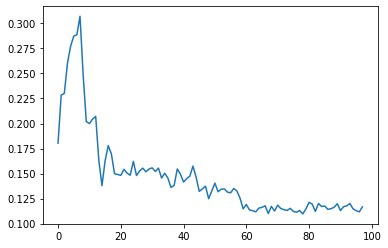

In [141]:
plots=[]
pd_scores=pd.DataFrame(scores)
plt.plot(pd_scores)
plt.show()

## solution: k=9 is best

## Spectral clustering

In [142]:
sc = SpectralClustering(n_clusters=9,assign_labels="kmeans",affinity='nearest_neighbors',n_neighbors=5)
clusters_labels = sc.fit_predict(dummy)
clusters_labels

c:\users\kwecky\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 7, ..., 0, 5, 0])

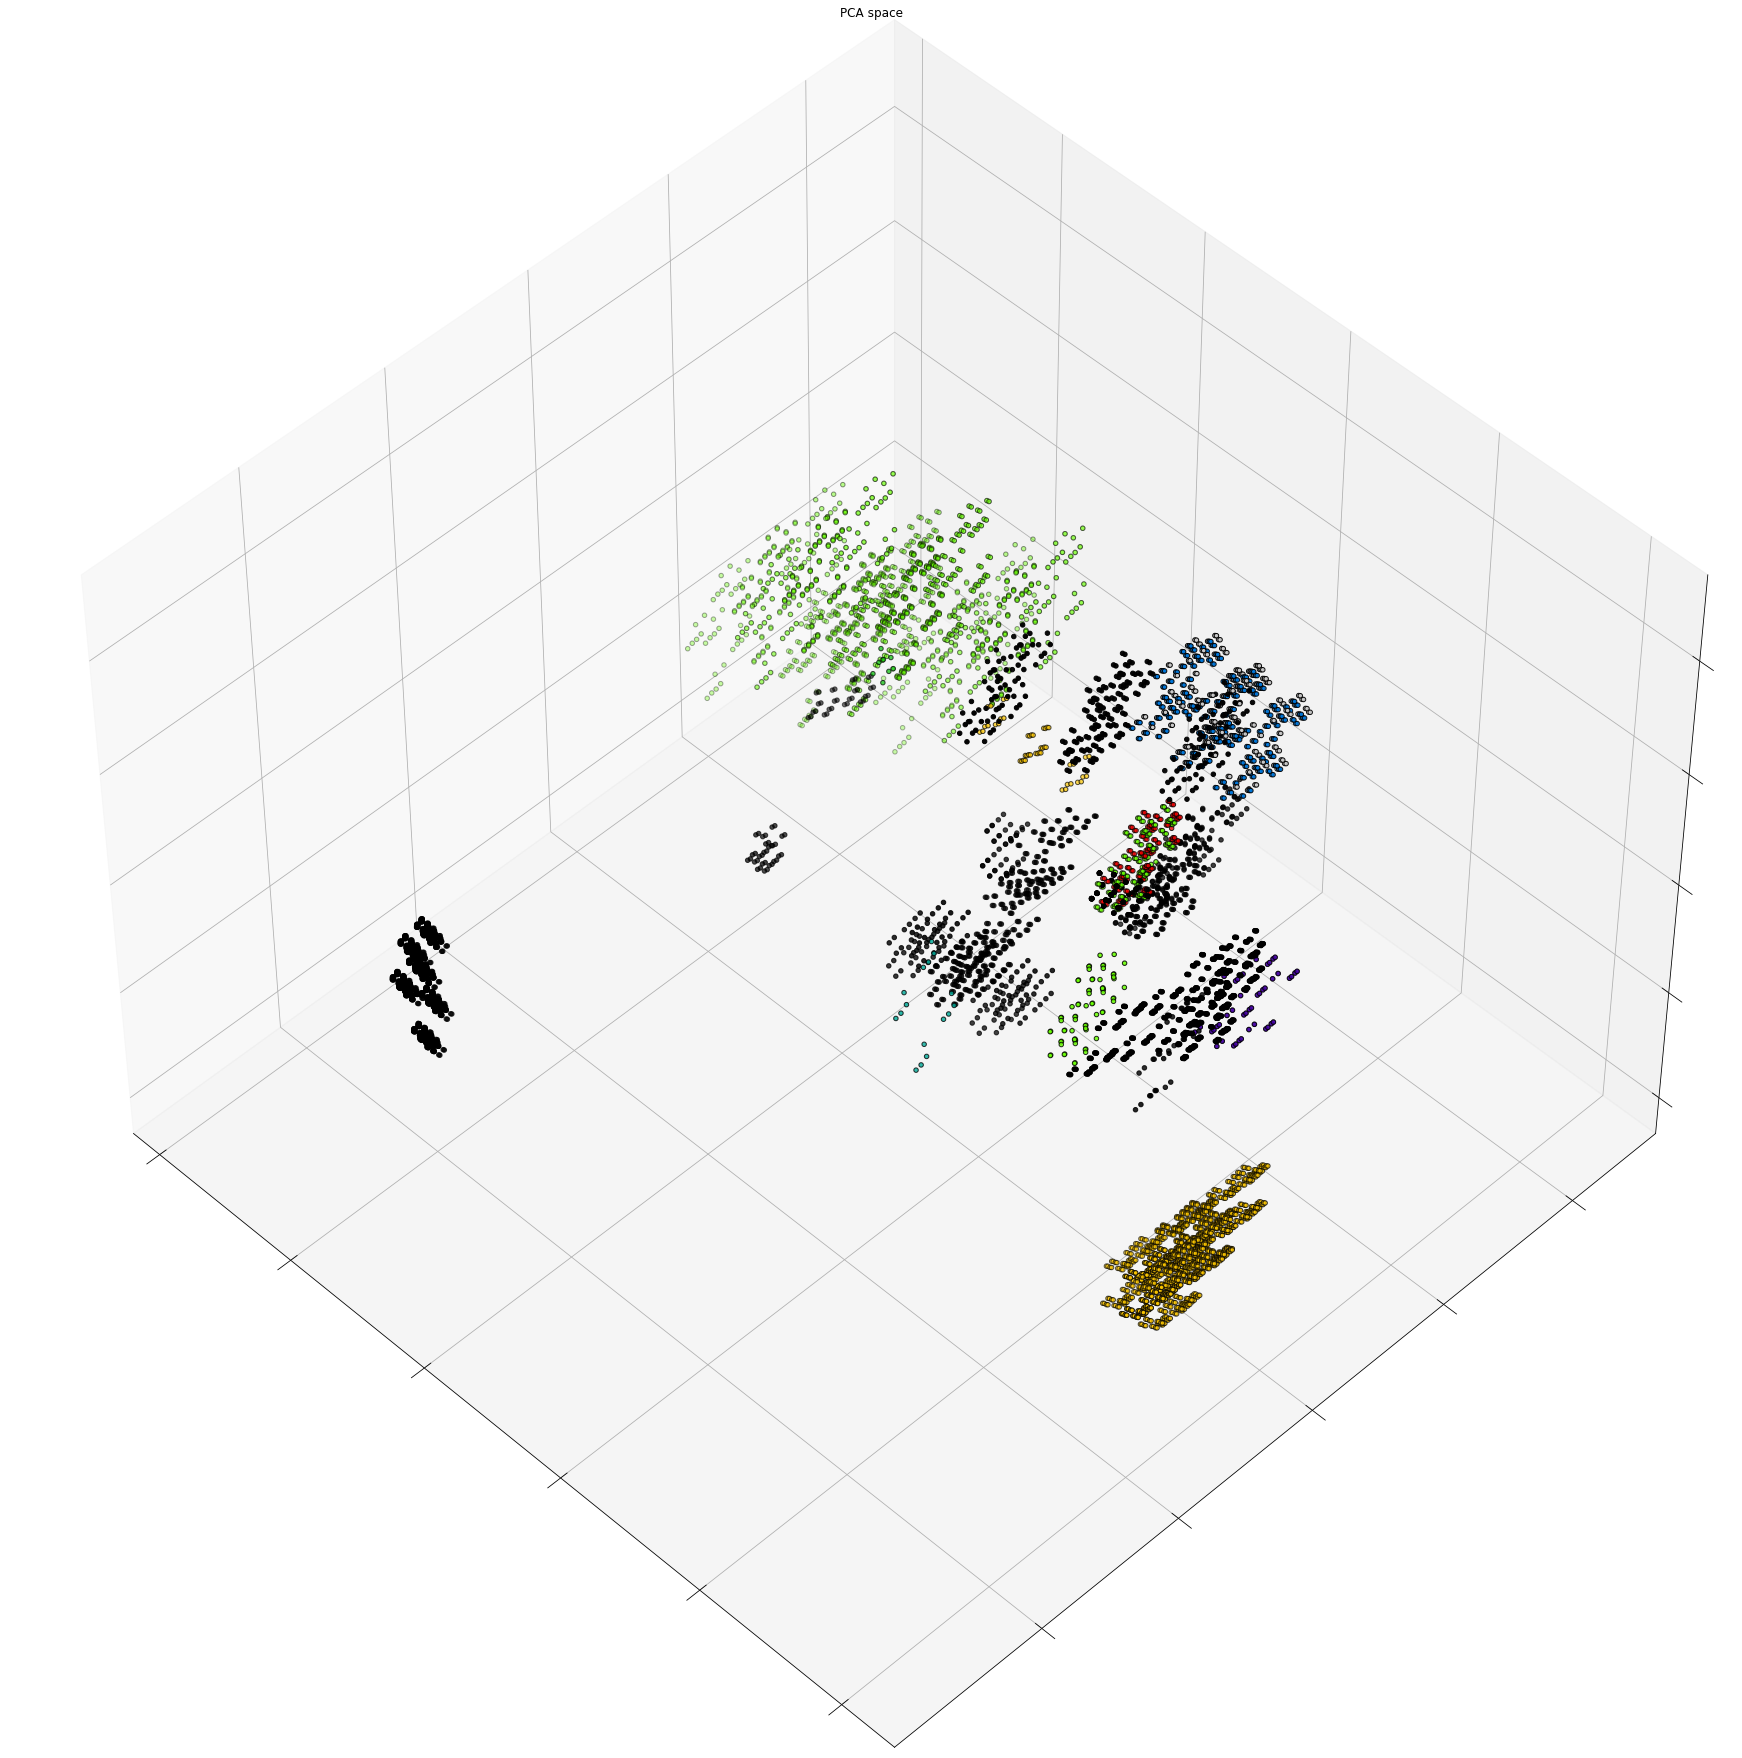

In [143]:
svc = SVC()
pca = PCA(n_components=3)
pipe =Pipeline([('reduce_dim',pca),('clf',svc)])
pipe.fit(dummy,clusters_labels)
pca_res = pca.transform(dummy)
pca_res

fig = plt.figure(2, figsize=(16, 12))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, 2, 2], elev=48, azim=135)

plt.cla()

ax2.scatter(pca_res[:, 0], pca_res[:, 1], pca_res[:, 2], c=clusters_labels, cmap=plt.cm.nipy_spectral,edgecolor='k')

ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_title("PCA space")

plt.draw()
plt.show()

## Conclution
This makes much more sense!!